# Goldilocks

# What is Goldilocks?
Goldilocks refers to the Goldilocks Finite Prime Field. All elements in Goldilocks are **integers modulo p**.

$$ p = 2^{64} - 2^{32} + 1 $$

$$ F_{p} = \{0, 1, 2, 3, \ldots, 2^{64} - 2^{32} \} $$

Goldilocks is used in Plonky2 and Plonky3


# Think it as a circle

Take $p=7$ as an example

$$ 6 + 1 = 7 \mod 7 = 0 $$
$$ 0 - 1 = -1 \mod 7 = 6 $$

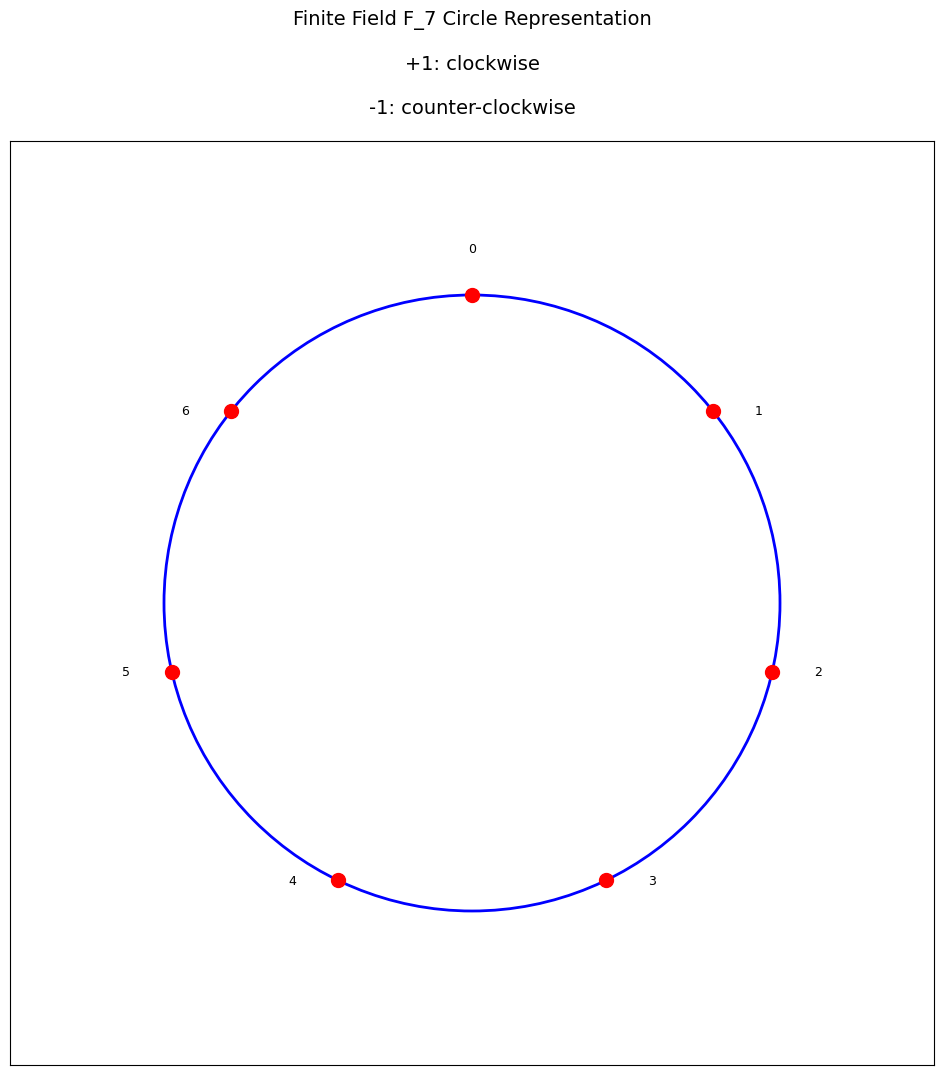

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def draw_finite_field_circle(n_points):
    # Create figure and axis
    plt.figure(figsize=(12, 12))
    ax = plt.gca()
    
    # Create circle
    circle = plt.Circle((0, 0), 1, fill=False, color='blue', linewidth=2)
    ax.add_patch(circle)
    
    # Generate points on the circle
    # Start from π/2 (top) and go clockwise
    theta = np.linspace(np.pi/2, -3*np.pi/2, n_points, endpoint=False)
    x = np.cos(theta)
    y = np.sin(theta)
    
    # Plot points and labels
    for i in range(n_points):
        # Plot point
        plt.plot(x[i], y[i], 'ro', markersize=10)
        
        # Adjust label position based on angle
        angle = theta[i]
        
        # Calculate offset for label placement
        if abs(x[i]) < 0.1:  # top or bottom
            label_x = x[i]
            label_y = y[i] + 0.15 * np.sign(y[i])
        else:  # sides
            label_x = x[i] + 0.15 * np.sign(x[i])
            label_y = y[i]
        
        # Format large numbers with scientific notation
        if i >= 1000:
            label = f"{i:.2e}"
        else:
            label = str(i)
            
        plt.text(label_x, label_y, label, 
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=9)
    
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    
    # Add title and grid
    plt.title(f'''Finite Field F_{n_points} Circle Representation\n
+1: clockwise\n
-1: counter-clockwise''', 
              pad=20, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    # Remove axis for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

draw_finite_field_circle(7)


# Add & Sub

$$ a + b \to a + b \mod p $$

$$ a - b \to a - b \mod p $$

In [2]:
p = 2**64 - 2**32 + 1
a = p - 1
b = p - 2
print(f"p = {p}")
print(f"a + b = {a + b}, overflow? {a + b > p}")
print(f"(a + b) mod p = {(a + b) % p}, overflow? {(a + b) % p >= p}")
print(f"(b - a) mod p = {(b - a) % p}, overflow? {(b - a) % p >= p}")


p = 18446744069414584321
a + b = 36893488138829168639, overflow? True
(a + b) mod p = 18446744069414584318, overflow? False
(b - a) mod p = 18446744069414584320, overflow? False


# Multiply
$$ a * b \to a * b \mod p $$

$$ (p-1)(p-2) \equiv p^2 - 3p + 2 \equiv 2 \mod p $$

In [3]:
p = 2**64 - 2**32 + 1
a = p - 1
b = p - 2
print(f"a * b mod p = {(a * b) % p}")

a * b mod p = 2


# Divide
Multiply the multiplicative inverse

$$ b \div a \to b * a^{-1} \mod p $$

# But what is multiplicative inverse in finite field?

Take $a = 3$ as an example, $a^{-1}$ is the multiplicative inverse of $a$. 

$a * a^{-1} \equiv 1 \mod p$

# How to compute it efficiently?
From [Fermat's little theorem](https://en.wikipedia.org/wiki/Fermat%27s_little_theorem)

$$ a * a^{p-2} = a^{p-1} \equiv 1 \mod p $$

## In a prime field $F_p$, the inverse of $a$ is $a^{p-2}$

In division $$ b \div a $$
1. Compute $a^{p-2}$
2. Compute $b * a^{p-2}$

## Example

In [11]:
def fast_exp(base, exp, mod):
    result = 1
    base = base % mod  # Ensure base is within the range of mod

    while exp > 0:
        if exp % 2 == 1:  # If exp is odd, multiply the result by base
            result = (result * base) % mod
        exp = exp // 2  # Divide exp by 2
        base = (base * base) % mod  # Square the base

    return result

a = 10
b = 4
print(f"{a} / {b} = ?")
inv = fast_exp(b, p-2, p)
print(f"inv = 4^(p-2) = {inv}")
result = a * inv % p
print(f"result = a * inv % p = {result}")
# Verify
print(f"{result} * {b} == {a} mod p? {result * b % p == a}")

10 / 4 = ?
inv = 4^(p-2) = 13835058052060938241
result = a * inv % p = 9223372034707292163
9223372034707292163 * 4 == 10 mod p? True


# Let's go deeper

## Origin
In [Ham15](https://eprint.iacr.org/2015/625.pdf) Mike Hamburg introduced a class of primes of the form $p = \phi^2 - \phi - 1$ and named them Goldilocks primes.

In these finite prime field, golden ratio is satisfied $\phi^2 \equiv \phi + 1 \mod p$

Then, because these primes have very few power-of-two roots of unity (which is required by FFT, check another FFT notebook for details), we instead consider primes of the form $\phi^2 - \phi + 1$, and we still call them Goldilocks primes

## Goldilocks prime $p = \phi^2 - \phi + 1$ is happy with FFT!

Since $\phi$ divides $p-1$, $p - 1 = \phi(\phi-1)$

Goldilocks primes must have $\phi th$ root of unity


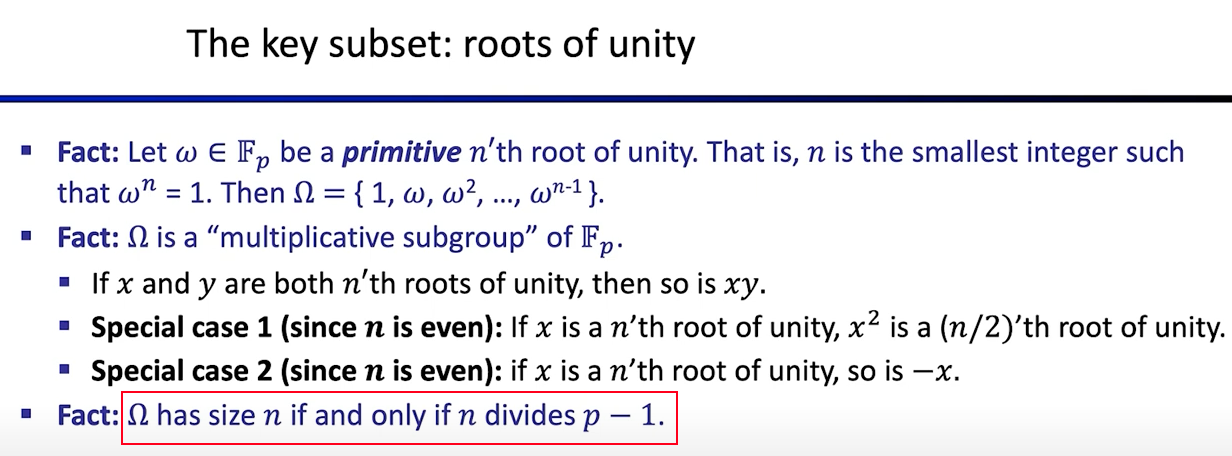
https://youtu.be/A3edAQDPnDY?si=vFng4NUpBhkcHbHE&t=2450

# How Plonky3 implement Goldilocks field?

# Reference

https://github.com/Plonky3/Plonky3/blob/784b7dd1fa87c1202e63350cc8182d7c5327a7af/goldilocks/src/goldilocks.rs

https://xn--2-umb.com/22/goldilocks/